In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
top = pd.read_excel(r"C:\Users\nanda\Desktop\TOP_BOOKS.xlsx")
top.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
top.shape

(550, 7)

In [4]:
top.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [5]:
top.describe(include='all')

,Name,Author,User Rating,Reviews,Price,Year,Genre
count,550,550,550.000000,550.000000,550.000000,550.000000,550
unique,351,248,NaN,NaN,NaN,NaN,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,NaN,NaN,NaN,NaN,Non Fiction
freq,10,12,NaN,NaN,NaN,NaN,310
mean,NaN,NaN,4.618364,11953.281818,13.100000,2014.000000,NaN
std,NaN,NaN,0.226980,11731.132017,10.842262,3.165156,NaN
min,NaN,NaN,3.300000,37.000000,0.000000,2009.000000,NaN
25%,NaN,NaN,4.500000,4058.000000,7.000000,2011.000000,NaN
50%,NaN,NaN,4.700000,8580.000000,11.000000,2014.000000,NaN
75%,NaN,NaN,4.800000,17253.250000,16.000000,2017.000000,NaN


In [6]:
top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [7]:
for i in top.columns:
    print(i,':','\n', top[i].unique(),'\n')

Name : 
 ['10-Day Green Smoothie Cleanse' '11/22/63: A Novel'
 '12 Rules for Life: An Antidote to Chaos' '1984 (Signet Classics)'
 '5,000 Awesome Facts (About Everything!) (National Geographic Kids)'
 'A Dance with Dragons (A Song of Ice and Fire)'
 'A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons'
 'A Gentleman in Moscow: A Novel'
 'A Higher Loyalty: Truth, Lies, and Leadership'
 'A Man Called Ove: A Novel'
 "A Patriot's History of the United States: From Columbus's Great Discovery to the War on Terror"
 'A Stolen Life: A Memoir' 'A Wrinkle in Time (Time Quintet)'
 'Act Like a Lady, Think Like a Man: What Men Really Think About Love, Relationships, Intimacy, and Commitment'
 'Adult Coloring Book Designs: Stress Relief Coloring Book: Garden Designs, Mandalas, Animals, and Paisley Patterns'
 'Adult Coloring Book: Stress Relieving Animal Designs'
 'Adult Coloring Book: Stress Relieving Patterns'
 'Adult Coloring Books: A Coloring Book fo

In [8]:
for i in top.columns:
    print(i,':',sum(top[i]=='?'))

Name : 0
Author : 0
User Rating : 0
Reviews : 0
Price : 0
Year : 0
Genre : 0


In [9]:
top.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [10]:
# DATA ANALYSIS

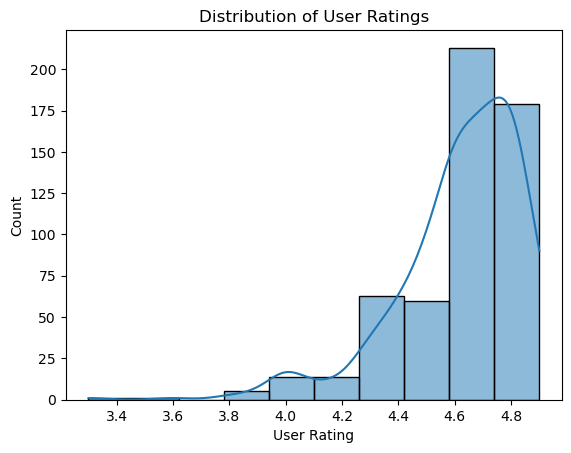

In [11]:
sns.histplot(top["User Rating"], bins=10, kde=True)
plt.title("Distribution of User Ratings")
plt.xlabel("User Rating")
plt.ylabel("Count")
plt.show()

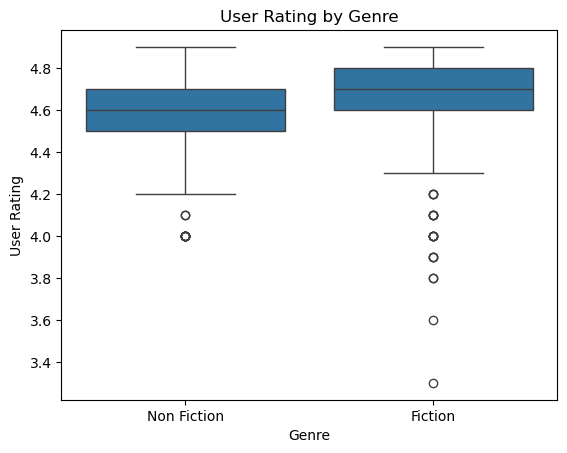

In [12]:
sns.boxplot(x="Genre", y="User Rating", data=top)
plt.title("User Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("User Rating")
plt.show()

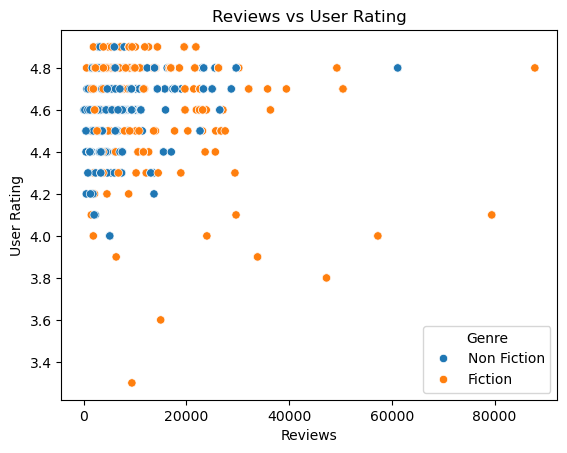

In [13]:
sns.scatterplot(x="Reviews", y="User Rating", hue="Genre", data=top)
plt.title("Reviews vs User Rating")
plt.xlabel("Reviews")
plt.ylabel("User Rating")
plt.show()

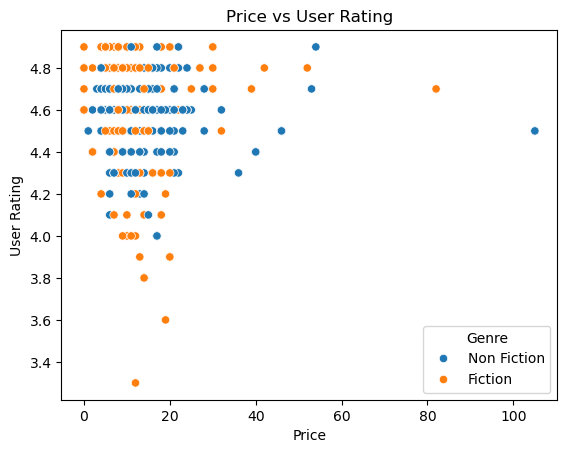

In [14]:
sns.scatterplot(x="Price", y="User Rating", hue="Genre", data=top)
plt.title("Price vs User Rating")
plt.xlabel("Price")
plt.ylabel("User Rating")
plt.show()

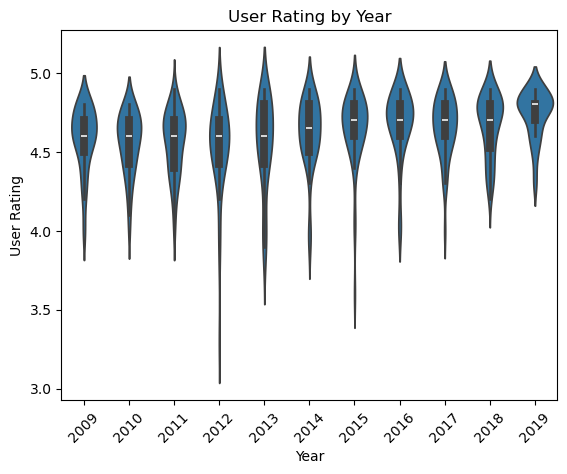

In [15]:
sns.violinplot(x="Year", y="User Rating", data=top)
plt.title("User Rating by Year")
plt.xlabel("Year")
plt.ylabel("User Rating")
plt.xticks(rotation=45)
plt.show()

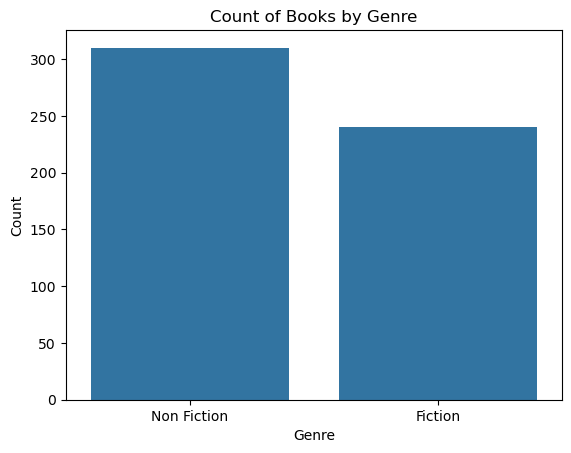

In [16]:
sns.countplot(x="Genre", data=top)
plt.title("Count of Books by Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

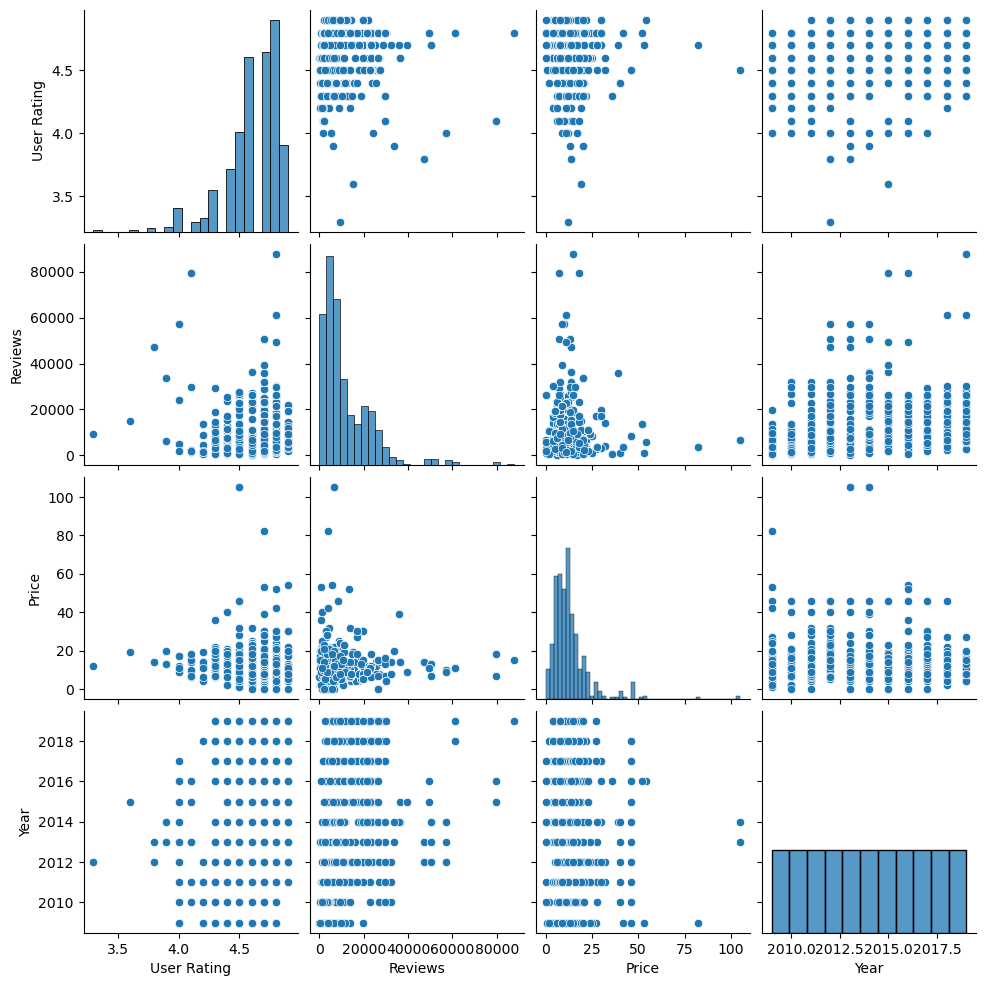

In [17]:
sns.pairplot(top[["User Rating", "Reviews", "Price", "Year"]])
plt.show()

In [18]:
numeric_df = top.select_dtypes(include=["number"])

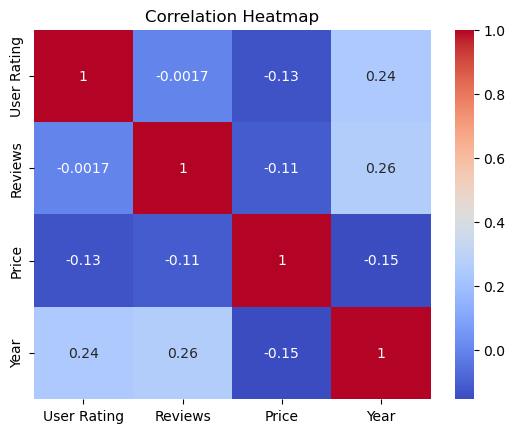

In [21]:
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

le_author = LabelEncoder()
top['Author'] = le_author.fit_transform(top['Author'])


In [23]:
le_name = LabelEncoder()
top['Name'] = le_name.fit_transform(top['Name'])
le_genre = LabelEncoder()
top['Genre'] = le_genre.fit_transform(top['Genre'])

In [24]:
ip = top.drop('Genre', axis=1)
op = top['Genre']

In [25]:
ip.head()

,Name,Author,User Rating,Reviews,Price,Year
0,0,114,4.7,17350,8,2016
1,1,219,4.6,2052,22,2011
2,2,134,4.7,18979,15,2018
3,3,95,4.7,21424,6,2017
4,4,174,4.8,7665,12,2019


In [26]:
op.head()

0    1
1    0
2    1
3    0
4    1
Name: Genre, dtype: int32

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.2)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [30]:
ypred = lr.predict(x_test)
ypred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [31]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
acc = accuracy_score(ypred,y_test)
rec = recall_score(ypred,y_test)
pre = precision_score(ypred,y_test)
f1 = f1_score(ypred,y_test)

print("accuracy = ",acc)
print("recall = ",rec)
print("Precision = ",pre)
print("f1 = ",f1)

accuracy =  0.6454545454545455
recall =  0.6666666666666666
Precision =  0.78125
f1 =  0.7194244604316546


In [32]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(ypred,y_test)
cm

array([[21, 14],
       [25, 50]], dtype=int64)

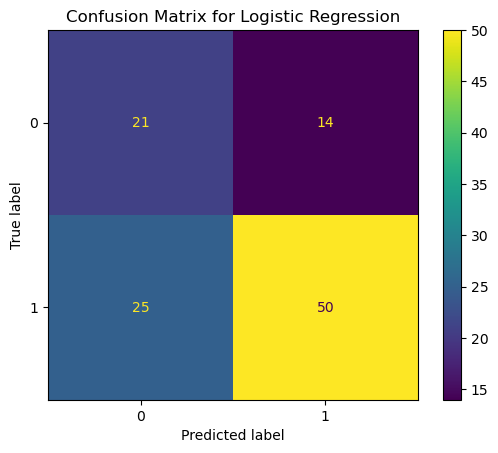

In [36]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [39]:
ypred1 = gnb.predict(x_test)
ypred1

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [40]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
acc1 = accuracy_score(ypred1,y_test)
rec1 = recall_score(ypred1,y_test)
pre1 = precision_score(ypred1,y_test)
f11 = f1_score(ypred1,y_test)

print("accuracy = ",acc1)
print("recall = ",rec1)
print("Precision = ",pre1)
print("f1 = ",f11)

accuracy =  0.5545454545454546
recall =  0.5882352941176471
Precision =  0.78125
f1 =  0.6711409395973155


In [41]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm1 = confusion_matrix(ypred1,y_test)
cm1

array([[11, 14],
       [35, 50]], dtype=int64)

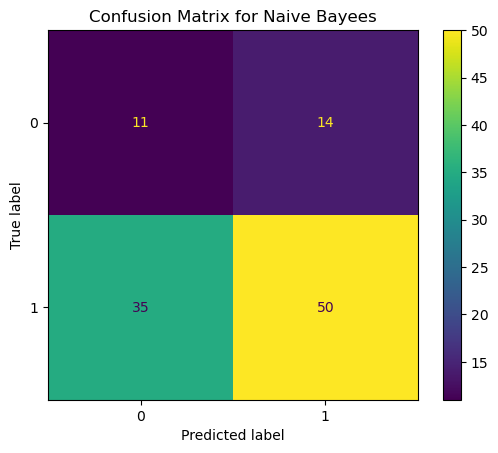

In [42]:
cmd1 = ConfusionMatrixDisplay(cm1)
cmd1.plot()
plt.title("Confusion Matrix for Naive Bayees")
plt.show()

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [44]:
ypred2 = knn.predict(x_test)
ypred2

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0])

In [45]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
acc2 = accuracy_score(ypred2,y_test)
rec2 = recall_score(ypred2,y_test)
pre2 = precision_score(ypred2,y_test)
f12 = f1_score(ypred2,y_test)

print("accuracy = ",acc2)
print("recall = ",rec2)
print("Precision = ",pre2)
print("f1 = ",f12)

accuracy =  0.7181818181818181
recall =  0.7704918032786885
Precision =  0.734375
f1 =  0.752


In [46]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm2 = confusion_matrix(ypred2,y_test)
cm2

array([[32, 17],
       [14, 47]], dtype=int64)

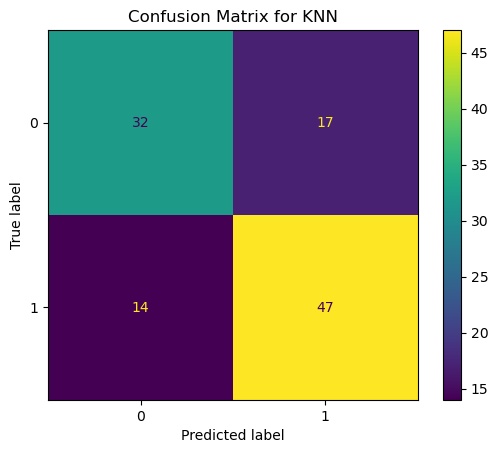

In [47]:
cmd2 = ConfusionMatrixDisplay(cm2)
cmd2.plot()
plt.title("Confusion Matrix for KNN")
plt.show()

In [48]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',C=1000,gamma=0.01)
svm.fit(x_train,y_train)

SVC(C=1000, gamma=0.01)

In [49]:
ypred3 = svm.predict(x_test)
ypred3

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0])

In [50]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
acc3 = accuracy_score(ypred3,y_test)
rec3 = recall_score(ypred3,y_test)
pre3 = precision_score(ypred3,y_test)
f13 = f1_score(ypred3,y_test)

print("accuracy = ",acc3)
print("recall = ",rec3)
print("Precision = ",pre3)
print("f1 = ",f13)

accuracy =  0.7181818181818181
recall =  0.7704918032786885
Precision =  0.734375
f1 =  0.752


In [51]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm3 = confusion_matrix(ypred3,y_test)
cm3

array([[32, 17],
       [14, 47]], dtype=int64)

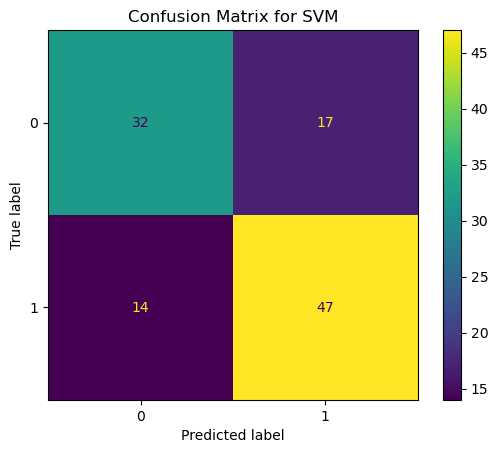

In [53]:
cmd3 = ConfusionMatrixDisplay(cm3)
cmd3.plot()
plt.title("Confusion Matrix for SVM")
plt.show()